## SVR on Position_Salaries.csv

This dataset contains position, level and salary of employee.
This model will predict salary which is continous value.

In [1]:
# Firstly lets import all essential libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:\\All Data Set\\Machine Learning Data Set\\Position_Salaries.csv")

In [3]:
#Lets take quick look on our datasets
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x=df.iloc[:,1:2].values
y=df.iloc[:,-1].values


#Feature Scaling
scale_x=StandardScaler()
scale_y=StandardScaler()
x=scale_x.fit_transform(x)
y=y.reshape((len(y),1))
y=scale_y.fit_transform(y)

In [5]:
#Fitting SVR model to data set
regressor=SVR(kernel="rbf")
regressor.fit(x, y)

C:\Users\sintg\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
#Predicting new result by SVR
y_pred=scale_y.inverse_transform(regressor.predict(scale_x.transform([[6.5]])))
y_pred

array([170370.0204065])

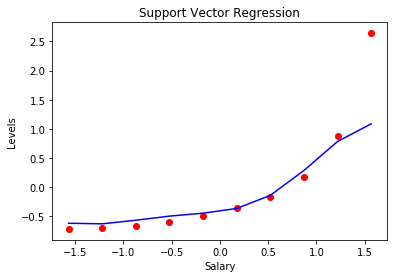

In [7]:
# Visualizing SVR result
plt.scatter(x, y, color="red")
plt.plot(x,regressor.predict(x),color="blue")
plt.xlabel("Salary")
plt.ylabel("Levels")
plt.title("Support Vector Regression")
plt.show()

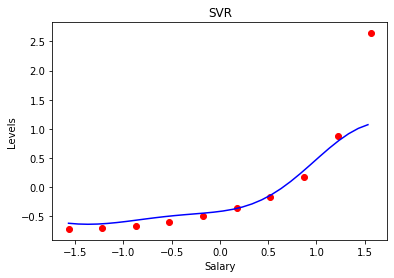

In [8]:
# Visualizing SVR result more smoother curve and high resolution
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x, y, color="red")
plt.plot(x_grid,regressor.predict(x_grid),color="blue")
plt.xlabel("Salary")
plt.ylabel("Levels")
plt.title("SVR")
plt.show()